In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [3]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

Funções para redução de repetição de código

In [4]:
def concat_list(lst):
    new_df = {}
    master_df = pd.DataFrame()
    file_path = "data_compressed_50hz/{}_normalized.csv"
    
    for key in lst:
        df = pd.read_table(file_path.format(key), header=None)
        master_df = pd.concat([master_df, df], axis=1)
    
    return master_df

def verify_clusters_inertia(df):
    inertia_range = list(range(1, 6))
    inertias = []

    for k in inertia_range:
        model = KMeans(n_clusters=k)
        model.fit(df)
        inertias.append(model.inertia_)
    
    plt.plot(inertia_range, inertias, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(inertia_range)
    plt.show()

LRATES = [100, 150, 200]

def display_TSNE(df, clusters):
    mergings = linkage(df, method='complete')
    labels = fcluster(mergings, clusters, criterion='distance')
    
    for rate in LRATES:
        model = TSNE(learning_rate=rate)
        transformed = model.fit_transform(df)

        xs = transformed[:,0]
        ys = transformed[:,1]

        plt.scatter(x=xs, y=ys, c=labels, alpha=0.5)
        plt.title("{} Clusters, {} learning rate".format(clusters, rate))
        plt.show()

In [5]:
TS_LIST =  ('TS1', 'TS2', 'TS3', 'TS4',)
SE_LIST =  ('SE',)
PS_LIST =  ('PS1', 'PS2', 'PS3', 'PS4', 'PS5','PS6',)
FS_LIST =  ('FS1', 'FS2',)
EPS_LIST = ('EPS1',)
CP_LIST =  ('CP',)
CE_LIST =  ('CE',)

# Temperature

Concatena TS_LIST

In [6]:
ts_df = concat_list(TS_LIST)

Verifica número de clusters ideais

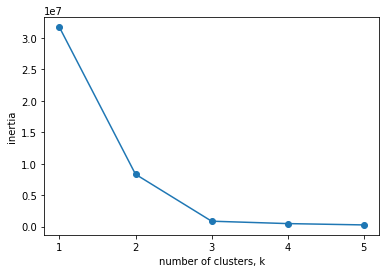

In [7]:
verify_clusters_inertia(ts_df)

Verifica TSNE

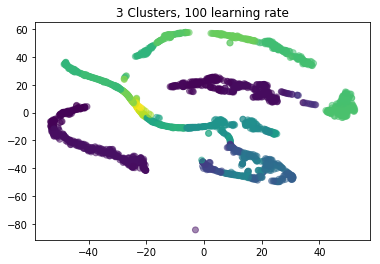

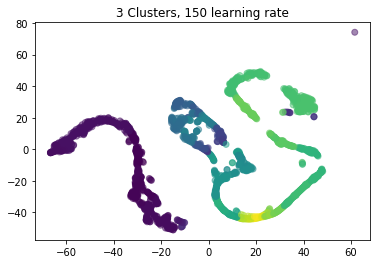

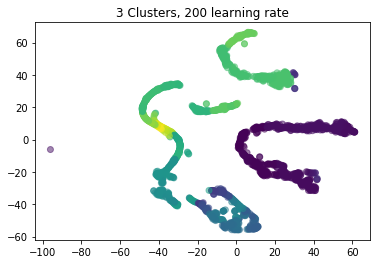

In [8]:
display_TSNE(ts_df, 3)

# Pressure

In [9]:
ps_df = concat_list(PS_LIST)

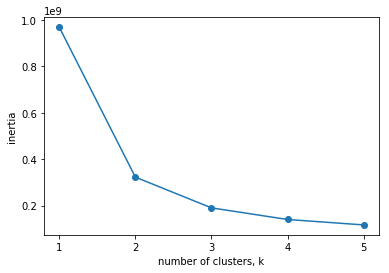

In [10]:
verify_clusters_inertia(ps_df)

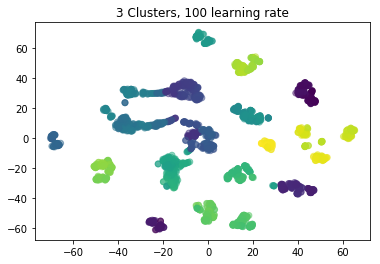

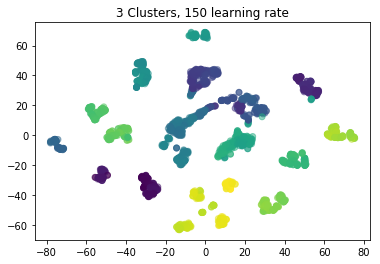

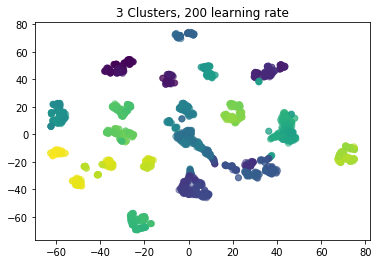

In [11]:
display_TSNE(ps_df, 3)

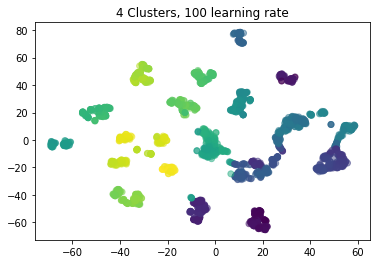

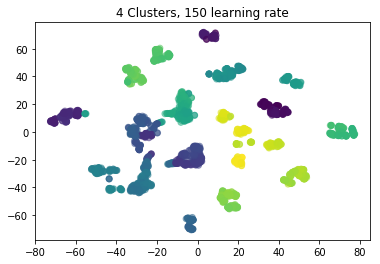

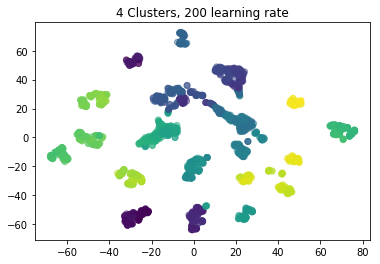

In [23]:
display_TSNE(ps_df, 4)

# Volume flow

In [14]:
fs_df = concat_list(FS_LIST)

In [16]:
fs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,8.373,0.776,0.667,0.006,0.0,0.003,0.0,0.0,0.0,0.0,...,10.182,10.18,10.163,10.167,10.194,10.193,10.171,10.167,10.173,10.176


In [17]:
# verify_clusters_inertia(fs_df)

n_samples=1 should be >= n_clusters=2

# Motor power

In [19]:
eps_df = concat_list(EPS_LIST)

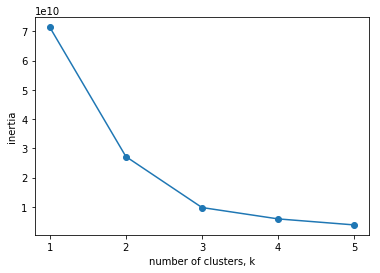

In [20]:
verify_clusters_inertia(eps_df)

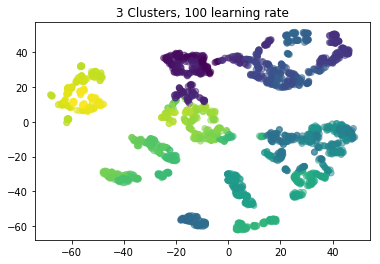

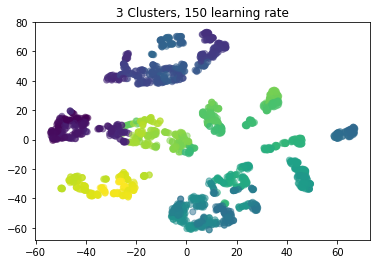

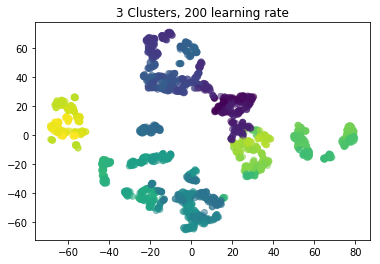

In [21]:
display_TSNE(eps_df, 3)

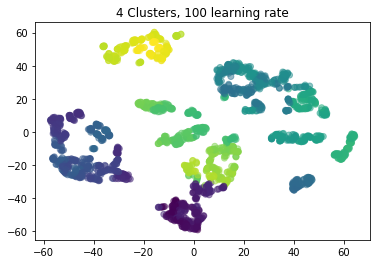

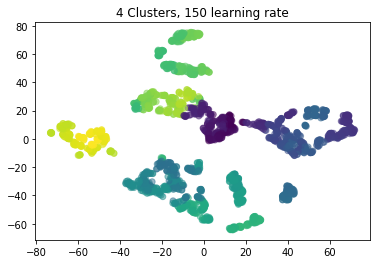

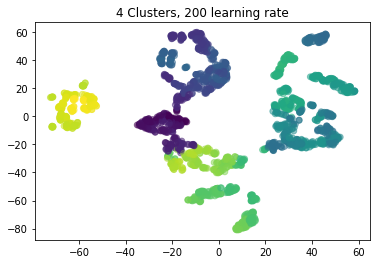

In [22]:
display_TSNE(eps_df, 4)

# Cooling efficiency

In [24]:
ce_df = concat_list(CE_LIST)

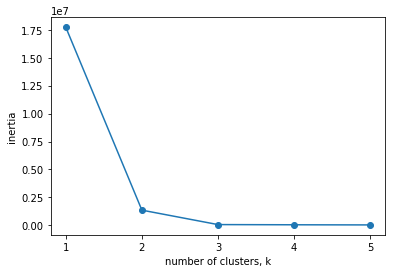

In [25]:
verify_clusters_inertia(ce_df)

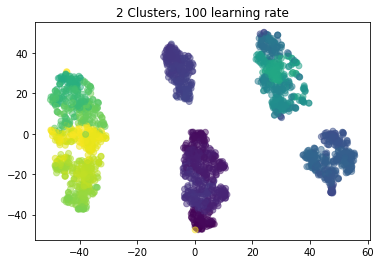

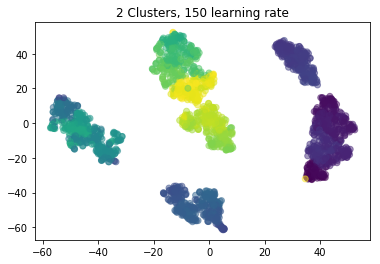

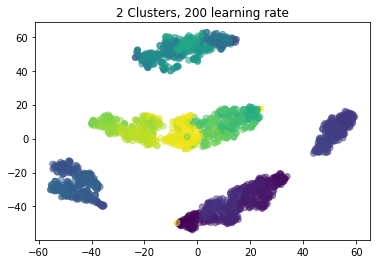

In [26]:
display_TSNE(ce_df, 2)

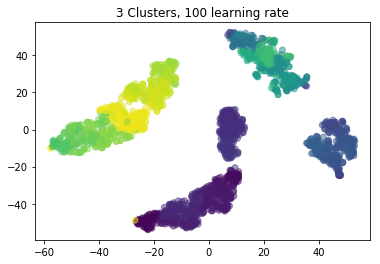

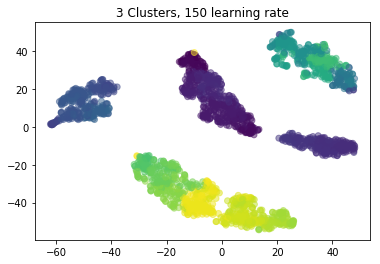

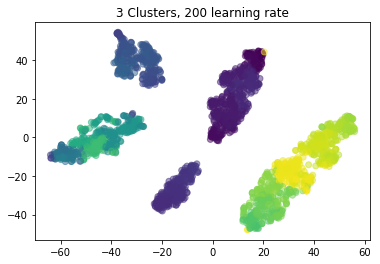

In [27]:
display_TSNE(ce_df, 3)

# Cooling power

In [28]:
cp_df = concat_list(CP_LIST)

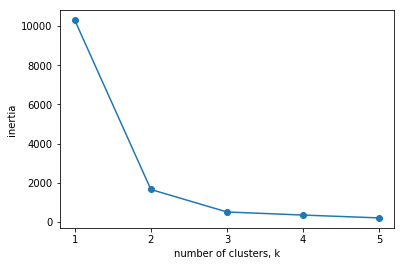

In [29]:
verify_clusters_inertia(cp_df)

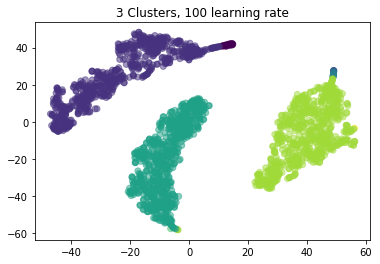

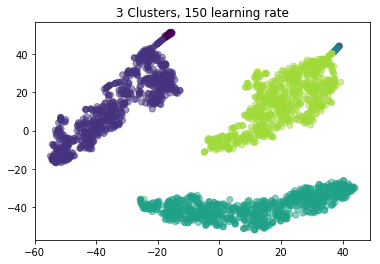

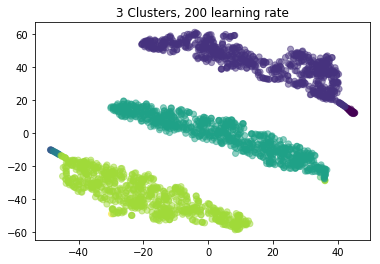

In [30]:
display_TSNE(cp_df, 3)